<a href="https://colab.research.google.com/github/SabalNiroula/Colab-files/blob/master/tensorflow_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to neural network classification with tensorflow

In this notebook we are going to learn how to write neural network for classification problems.

A classification is when you try to classifiy something as one thing or another.

A few type of classification problem are
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

### create a dataset from sklearn and view it

In [ ]:
from sklearn.datasets import make_circles

n_sample = 1000

X, y = make_circles(n_sample,
                   noise = 0.03,
                   random_state=42)


In [ ]:
print(X[:10])
print(y[:10])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
circle = pd.DataFrame({"X1":X[:,0], "X2": X[:, 1], "label":y})
circle.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


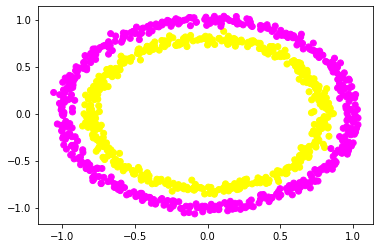

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring)

In [ ]:
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy']) # out of 100 data how mny our model get right

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [ ]:
# let's train for longer
model_1.fit(X, y, verbose=0, epochs=200)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## lets add another layer in Sequential API


In [ ]:
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(X, y, verbose=0, epochs = 100)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

### Improving our model by doing experiment
1. create a model - add more layer
2. compile a model - use Adam optimizer instead of SGD
3. fitting a model - fitting model for more epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, verbose=0, epochs = 350)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 2.2998e-04 - accuracy: 1.0000


[0.0002299830666743219, 1.0]

In [ ]:
y_pred = model_3.predict(X)

32/32 [==============================] - 0s 3ms/step


In [ ]:
type(model_1)

keras.engine.sequential.Sequential

## To visualize our model prediction, let's create a function `plot_decision_boundary`, this function will :

* Take in a trained model, X and y
* create a meshgrid on different X values 
* Plot the predictions as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np
X_min, X_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
y_min, y_max =  X[:, 1].min() -0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                       np.linspace(y_min, y_max, 100))
# print(xx.shape, yy.shape)
# print(len(xx.ravel()))


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


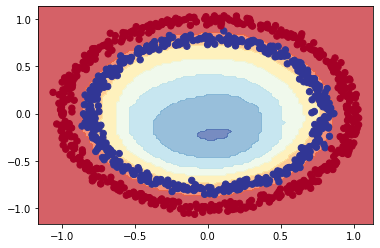

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_train_reg = X_regression[:160]
X_test_reg = X_regression[160:]

y_train_reg = X_regression[:160]
y_test_reg = X_regression[160:]


Let's check if our model_3 works for regression problem

In [ ]:
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
           optimizer = tf.keras.optimizers.Adam(),
           metrics=['mse'])

model_3.fit(tf.expand_dims(X_train_reg, axis=1), y_train_reg, epochs=200, verbose=0)

In [ ]:
model_3.evaluate(X_test_reg, y_test_reg)

2/2 [==============================] - 0s 12ms/step - loss: 4.3757 - mse: 17.1676


[4.375734329223633, 17.167644500732422]

2/2 [==============================] - 0s 4ms/step


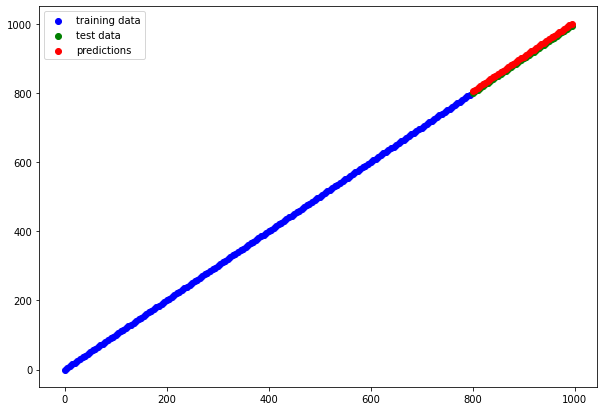

In [ ]:
y_reg_pred = model_3.predict(tf.expand_dims(X_test_reg,axis=1))

plt.figure(figsize=(10, 7))
plt.scatter(X_train_reg, y_train_reg, c='b', label="training data")
plt.scatter(X_test_reg, y_test_reg, c='g', label = 'test data')
plt.scatter(X_test_reg, y_reg_pred, c='r', label = 'predictions')
plt.legend()

## The missing piece: Non linearity

let's try to build neural network with non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_5.fit(X, y, verbose=0, epochs=250)

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.8297e-04 - accuracy: 1.0000


[0.00048297259490936995, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


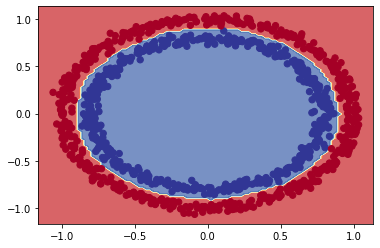

In [ ]:
plot_decision_boundary(model_5, X, y)

let's replicate activation function

In [ ]:
A = tf.cast(np.arange(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

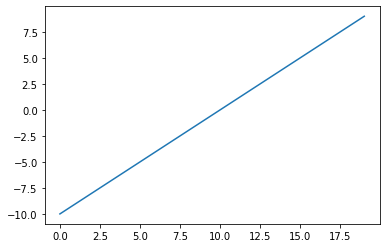

In [ ]:
# before using any function
plt.plot(A)

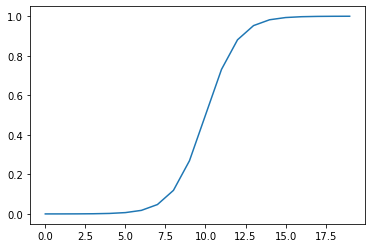

In [ ]:
# the formula of sigmoid function is sigmoid = 1/(1+ exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

plt.plot(sigmoid(A))

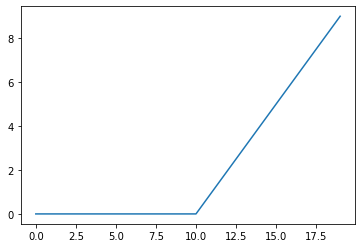

In [ ]:
# let's create relu function
def relu(x):
  return tf.maximum(0, x)

plt.plot(relu(A))

In [ ]:
# lets' try linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

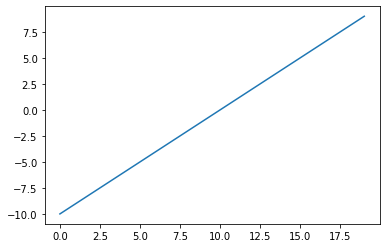

In [ ]:
# the output is same. Does it change anything?
plt.plot(tf.keras.activations.linear(A))

up until now we're doing the wrong way to evaluate our data.
so let's create a training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [ ]:
# set random seed
tf.random.set_seed(42)

#create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.03),
                metrics=['accuracy'])

history = model_7.fit(X_train, y_train, verbose=0, epochs = 250)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000


[0.009505679830908775, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


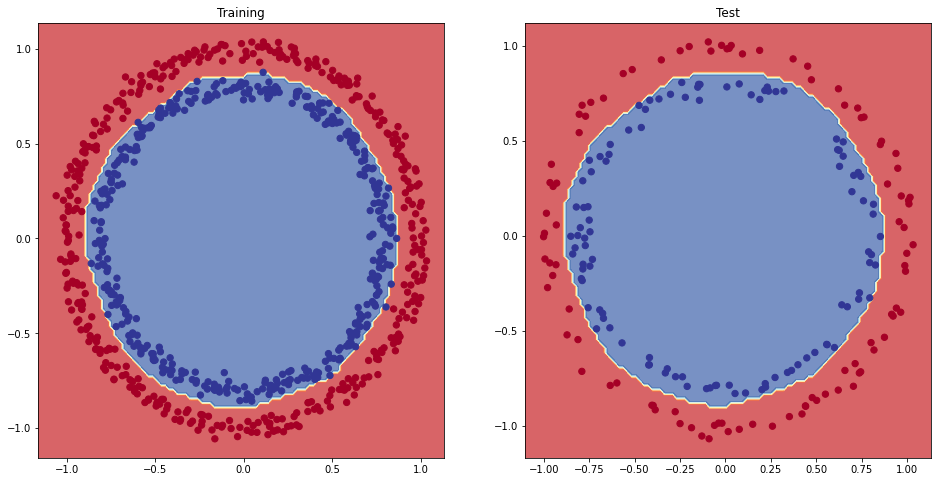

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

## The **history** is used while fitting because it return History object which can be used to plot loss and accuracy curve

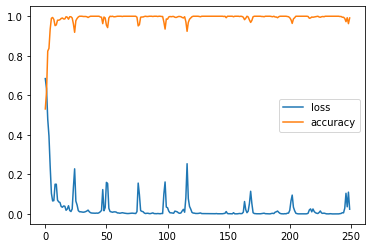

In [ ]:
pd.DataFrame(history.history).plot()

## Finding the best learning rate

To find the best learning rate ( the learning rate where the loss decreases the most during training ) We're going to use the following  steps:

* A learning rate **callback** - you can think of callback as a function, where you can add while training
* Another model ( we could use the same one as above, but we're practicing building models here. 
* A modified loss curves plot.

In [ ]:
# set random seed 
tf.random.set_seed(42)

# create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# creating learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history = model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

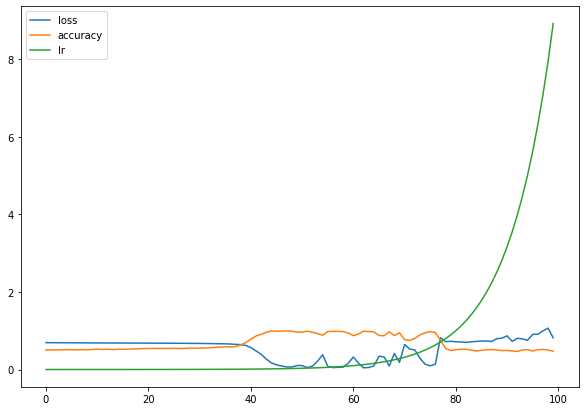

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

Text(0.5, 1.0, 'Learning rate vs loss')

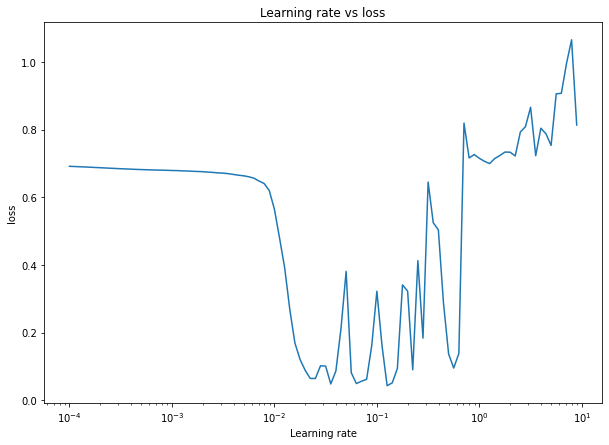

In [ ]:
# plot the learning rate vs loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

here find the lowest point of loss curve and then divide by 10 and set that as lr.

eg in graph lowest point is around 10e-1 and divide by 10 i.e. 10e-2 is your lr.

In [ ]:
# Creating a new model with improved lr from above

# set random seed 
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0325),
                metrics=['accuracy'])


history = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6858 - accuracy: 0.5512
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6463
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7613
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.9038
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9688
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9887
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9962
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9925
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9937
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9975
Epoch 11/

## More classification evaluation methods

some classification evaluation methods are:

1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification Report (from scikit-learn)

In [ ]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"The loss of model is {loss:.5f}")
print("The accuracy of model is {:.2f}%".format((accuracy*100)))


7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
The loss of model is 0.00157
The accuracy of model is 100.00%


### How about confusion matrix ? 

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_7.predict(X_test) # it is in float form of [[9.8e-1], ..] ravel()convert flatten it to 1D array 

y_pred_int =  np.round(y_preds.ravel(),1).astype(int)

confusion_matrix(y_test, y_pred_int)

7/7 [==============================] - 0s 2ms/step


array([[96,  0],
       [ 8, 96]])

In [ ]:
y_test.shape, y_pred_int.shape

((200,), (200,))

how about we prettify our confusion matrix ? 

In [ ]:
def plot_cm(y_test, y_pred):
  import itertools

  figsize = (10,10)

  # Create a confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype(float) / cm.sum(axis=1) [:, np.newaxis]

  n_classes = cm.shape[0] # shape of 1D array 

  #  Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # creating a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

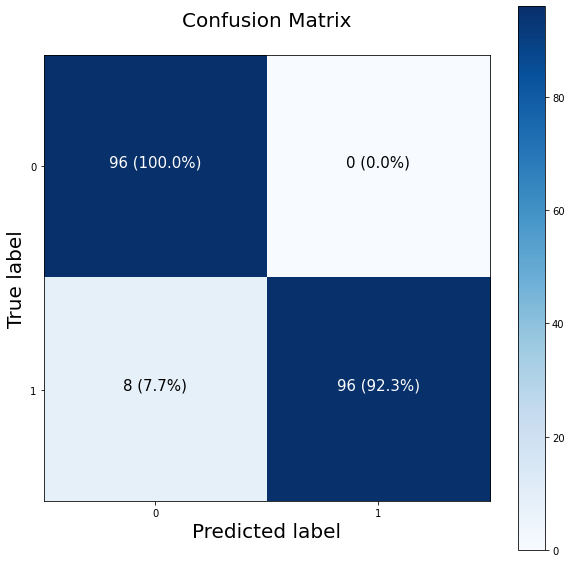

In [ ]:
plot_cm(y_test, y_pred_int)

# Working with larger example ( multiclass classification )

When you have more than two different classes, it is called **multi-class classification**.

* This means when you have three different classes it is called multi-class classification
* It also means when you have 100 different classes, it's multi-class classification

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 

In [4]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
train_data[0], train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
train_data[0].shape, train_label[0].shape

((28, 28), ())

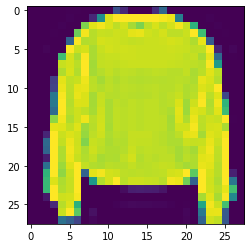

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

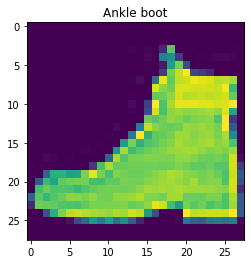

In [ ]:
index = 1237
plt.imshow(train_data[index])
plt.title(class_names[train_label[index]])

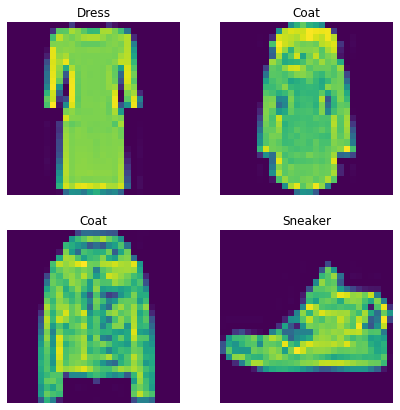

In [ ]:
# plot multiple random fashion mnist sample
import random 
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  index = random.choice(range(len(train_data)))
  ax.imshow(train_data[index])
  plt.title(class_names[train_label[index]])
  plt.axis(False)

## Building a multiclass classification

For our multi-class classification model, we can use similar architecture to our binary classification, however we're going to tweak few things:
* input_shape = train_data[0].shape =(28,28)
* output shape = 10
* loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one-hot encoded use CategoricalCrossentropy we can do this by *tf.one_hot(label, depth=no_of_labels)* else use SparseCategoricalentropy()
* output layer activation = softmax

In [ ]:
# our data need to be flattened from (28*28) into 784
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile a model
# here we use SparseCategoricalentropy because we have integer label and CategoricalCE expects one hot encoded labels
model_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= 'adam',
                 metrics =['accuracy'])

history = model_10.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2637 - accuracy: 0.1916 - val_loss: 1.7262 - val_accuracy: 0.2591
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6493 - accuracy: 0.3062 - val_loss: 1.5814 - val_accuracy: 0.3594
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5445 - accuracy: 0.3595 - val_loss: 1.5138 - val_accuracy: 0.3622
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4458 - accuracy: 0.4018 - val_loss: 1.3606 - val_accuracy: 0.4486
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3005 - accuracy: 0.4483 - val_loss: 1.2637 - val_accuracy: 0.4579
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2588 - accuracy: 0.4550 - val_loss: 1.2545 - val_accuracy: 0.4632
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2372 - accuracy: 0.4626 - val_loss: 1.2533 - val_accuracy

In [ ]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 7,944
Trainable params: 7,944
Non-trainable params: 0
_________________________________________________________________


### Neural network tend to have their data scaled i.e. between 0 & 1. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

class MinMaxScaler3D(MinMaxScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)


In [ ]:
scalar = MinMaxScaler3D()


# transform training and testing data
train_data_scaled = scalar.fit_transform(train_data)
test_data_scaled = scalar.fit_transform(test_data)

# print(train_data_scaled)

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / train_data.max().astype(float)
test_data_norm = test_data / test_data.max().astype(float)


In [ ]:
# random seed
tf.random.set_seed(42)

# Create a model
model_scaled_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile a model
model_scaled_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= 'adam',
                 metrics =['accuracy'])

history1 = model_scaled_1.fit(train_data_scaled, train_label, epochs=10, validation_data=(test_data_scaled, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8508 - accuracy: 0.7087 - val_loss: 0.6086 - val_accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5533 - accuracy: 0.8080 - val_loss: 0.5661 - val_accuracy: 0.8121
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8297 - val_loss: 0.5306 - val_accuracy: 0.8204
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.8390 - val_loss: 0.4950 - val_accuracy: 0.8351
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4500 - accuracy: 0.8434 - val_loss: 0.5067 - val_accuracy: 0.8261
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4356 - accuracy: 0.8478 - val_loss: 0.4829 - val_accuracy: 0.8356
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4244 - accuracy: 0.8507 - val_loss: 0.4893 - val_accuracy:

In [ ]:
# random seed
tf.random.set_seed(42)

# Create a model
model_norm_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile a model
model_norm_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= 'adam',
                 metrics =['accuracy'])

history2 = model_norm_2.fit(train_data_norm, train_label, epochs=10, validation_data=(test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8508 - accuracy: 0.7087 - val_loss: 0.6086 - val_accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5533 - accuracy: 0.8080 - val_loss: 0.5661 - val_accuracy: 0.8121
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8297 - val_loss: 0.5306 - val_accuracy: 0.8204
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4705 - accuracy: 0.8390 - val_loss: 0.4950 - val_accuracy: 0.8351
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4500 - accuracy: 0.8434 - val_loss: 0.5067 - val_accuracy: 0.8261
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4356 - accuracy: 0.8478 - val_loss: 0.4829 - val_accuracy: 0.8356
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4244 - accuracy: 0.8507 - val_loss: 0.4893 - val_accuracy:

<Figure size 720x504 with 0 Axes>

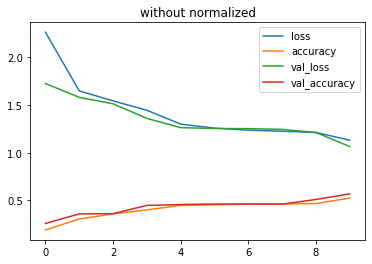

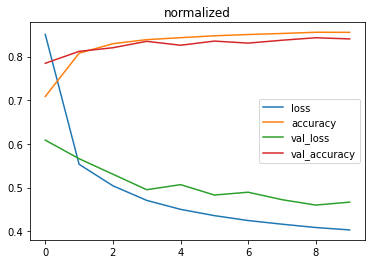

In [ ]:
import pandas as pd
plt.figure(figsize=(10,7))
pd.DataFrame(history.history).plot(title="without normalized")
pd.DataFrame(history1.history).plot(title="normalized")


>🔑 **Note**: The same model with even slightly different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [ ]:
# finding the ideal learning rate

# set the seed
tf.random.set_seed(42)

# create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# make learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10e-3 * 10 ** (epoch/20))

# fit the model
history3 = model_11.fit(train_data_scaled, train_label, epochs = 40, validation_data = (test_data_scaled, test_label), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8732 - accuracy: 0.6789 - val_loss: 0.7303 - val_accuracy: 0.7358 - lr: 0.0100
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7019 - accuracy: 0.7438 - val_loss: 0.6908 - val_accuracy: 0.7480 - lr: 0.0112
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6697 - accuracy: 0.7559 - val_loss: 0.6933 - val_accuracy: 0.7356 - lr: 0.0126
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6617 - accuracy: 0.7579 - val_loss: 0.6952 - val_accuracy: 0.7424 - lr: 0.0141
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6621 - accuracy: 0.7587 - val_loss: 0.6983 - val_accuracy: 0.7449 - lr: 0.0158
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6686 - accuracy: 0.7556 - val_loss: 0.6729 - val_accuracy: 0.7274 - lr: 0.0178
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'learning rate vs loss')

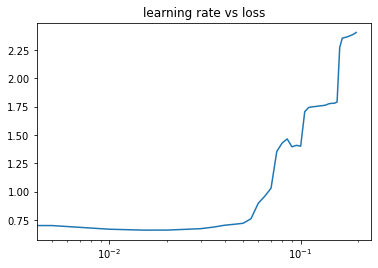

In [ ]:
import matplotlib.pyplot as plt

lrs = 10e-3 * 10 * (tf.range(40)/20)

plt.semilogx(lrs, history3.history['loss'])
plt.title("learning rate vs loss")


In [ ]:
# set the seed
tf.random.set_seed(42)

# create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = ['accuracy'])

# fit the model
history3 = model_12.fit(train_data_scaled, train_label, epochs = 20, validation_data = (test_data_scaled, test_label))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9186 - accuracy: 0.6554 - val_loss: 0.8210 - val_accuracy: 0.6915
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7388 - accuracy: 0.7336 - val_loss: 0.8366 - val_accuracy: 0.7233
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7195 - accuracy: 0.7395 - val_loss: 0.7303 - val_accuracy: 0.7196
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7082 - accuracy: 0.7463 - val_loss: 0.7224 - val_accuracy: 0.7441
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7066 - accuracy: 0.7468 - val_loss: 0.7482 - val_accuracy: 0.7384
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7085 - accuracy: 0.7448 - val_loss: 0.7823 - val_accuracy: 0.7111
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7086 - accuracy: 0.7453 - val_loss: 0.8525 - val_accuracy

## Evaluating our multi-class classification 

To evaluate multi-class classification, we could:
* Evaluate its performance using other classification metrics(confusion matrix)
* Access some of its prediction (through visualization)
* Improve its result (by training it for longer or changing its architecture)
* Save and export it for use in application 

Let's go to top 2...

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, classes=None, figsize=(10,10), textsize=15):
  import itertools

  # Create a confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype(float) / cm.sum(axis=1) [:, np.newaxis]

  n_classes = cm.shape[0] # shape of 1D array 

  #  Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # creating a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(textsize)
  ax.yaxis.label.set_size(textsize)
  ax.title.set_size(textsize)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred = model_12.predict(test_data_scaled)

y_pred[:10]

313/313 [==============================] - 0s 1ms/step


array([[1.69206050e-05, 1.69312269e-35, 1.60558872e-10, 5.01266951e-16,
        2.03558585e-14, 1.06419258e-01, 6.87667067e-12, 3.79287116e-02,
        8.07967081e-05, 8.55554283e-01],
       [6.62142411e-04, 5.96792903e-18, 9.43357706e-01, 2.34974475e-08,
        2.97637917e-02, 7.57991674e-24, 2.62162033e-02, 9.02559837e-20,
        1.14989916e-07, 6.89444857e-09],
       [1.05136947e-03, 9.46308434e-01, 2.88143114e-04, 4.48504947e-02,
        8.33189464e-04, 2.13381834e-04, 1.42125599e-03, 4.46544436e-06,
        5.02875447e-03, 3.54345815e-07],
       [1.05136947e-03, 9.46308434e-01, 2.88143114e-04, 4.48504947e-02,
        8.33189464e-04, 2.13381834e-04, 1.42125599e-03, 4.46544436e-06,
        5.02875447e-03, 3.54345815e-07],
       [9.53118503e-02, 1.38670039e-05, 5.11679530e-01, 2.41851211e-02,
        9.59439129e-02, 1.54583735e-09, 2.70468593e-01, 1.92571565e-06,
        2.32639373e-03, 6.87712454e-05],
       [1.05136947e-03, 9.46308434e-01, 2.88143114e-04, 4.48504947e-02,
   

In [ ]:
# convert prediction probability into integers
y_pred = y_pred.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 6, 1, 5])

In [ ]:
test_data_scaled.shape, y_pred.shape

((10000, 28, 28), (10000,))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label, y_pred)

array([[711,   5, 101, 123,  15,   1,  33,   0,  11,   0],
       [  1, 926,   7,  57,   4,   0,   1,   0,   4,   0],
       [ 16,   1, 707,  18, 230,   0,  19,   0,   9,   0],
       [ 71,  27,  53, 781,  33,   0,  31,   1,   3,   0],
       [  0,   1, 163,  23, 776,   0,  20,   0,  17,   0],
       [  0,   4,   0,   0,   0, 868,   0,  63,   8,  57],
       [138,   9, 410,  71, 304,   0,  53,   0,  15,   0],
       [  0,   0,   0,   0,   0,  35,   0, 877,   0,  88],
       [  0,  14,  21,  13,  58,  15,   1,   3, 874,   1],
       [  0,   0,   1,   0,   0,   3,   0,  30,   0, 966]])

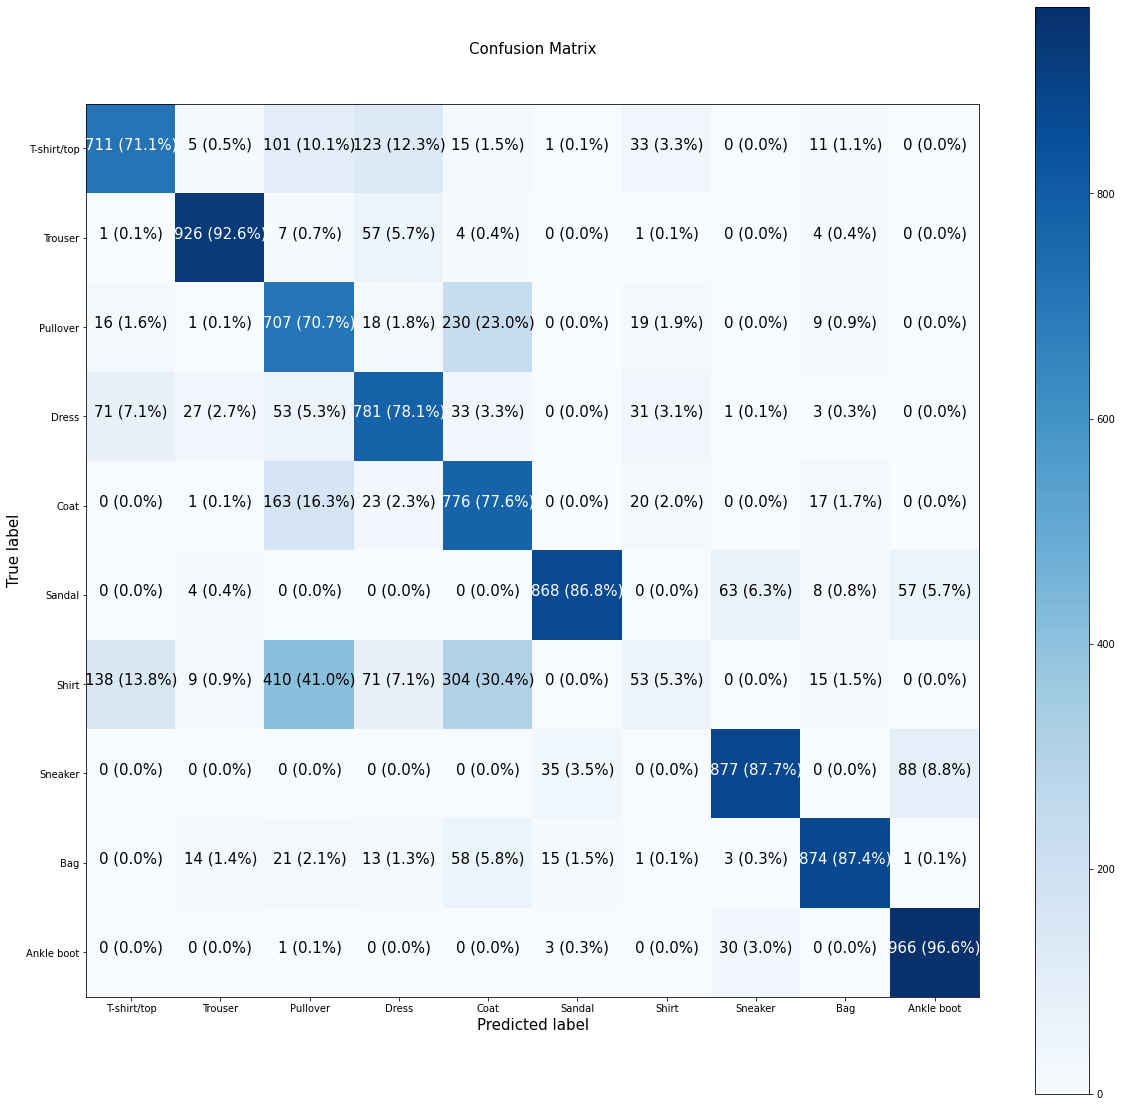

In [ ]:
plot_confusion_matrix(test_label, y_pred, classes=class_names, figsize=(20,20), textsize=15)

In first row, 101 Tshirt/top is wrongly identified as pullover

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 18ms/step


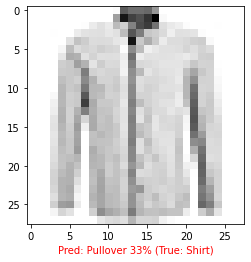

In [ ]:
plot_random_image(model=model_12, 
                  images=test_data_scaled, 
                  true_labels=test_label, 
                  classes=class_names)

## **What patterns is our model learning?**
*We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_12`) using the `layers` attribute.

In [ ]:
model_12.layers

In [ ]:
layer_1 = model_12.layers[1]
layer_1

In [ ]:
weight, biases = layer_1.get_weights()
weight, weight.shape

(array([[ 2.8610483e-02,  1.0809086e+01, -2.5577594e-02, ...,
          6.4752556e-02, -4.7580428e-02, -4.8124515e-02],
        [-3.2965600e-02,  4.0207577e+00, -6.3773446e-02, ...,
          1.5383749e+01,  2.3391671e-02, -5.2274261e-02],
        [ 3.9886989e-02,  1.1026090e+01, -6.8227977e-02, ...,
          1.2698124e+01,  6.1326273e-02, -1.0323405e-02],
        ...,
        [ 1.1324477e-01,  7.9077256e-01,  1.3592668e-02, ...,
         -2.8122559e-01,  1.7463261e-01, -3.1282313e-02],
        [ 4.2550959e-02, -5.4161888e-01,  6.2723733e-02, ...,
          4.0024409e+00, -7.5127900e-02, -1.7539926e-02],
        [ 2.0276159e-03,  2.6933770e+00, -5.1111333e-02, ...,
         -2.2718668e+00, -5.2630380e-03, -1.4679760e-02]], dtype=float32),
 (784, 10))

weight shape returns 784, the input_shape multiplied i.e. (28 * 28 = 874) and 10, the no. of neuron in that layer

similarly, the weight has 10 1D array which has weight of each neuron

In [ ]:
# similarly let's checkout biases
biases, biases.shape

(array([-0.0752326 , 16.740515  , -0.12010095, -0.12010649, -0.12009946,
        -0.12008181, 12.5067005 , 11.76834   , -0.08869099, -0.16685075],
       dtype=float32), (10,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.



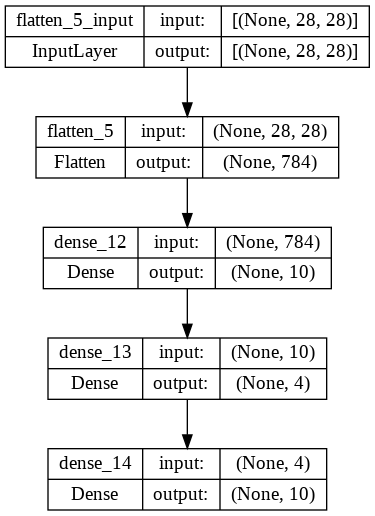

In [ ]:
# another way to view deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_12, show_shapes=True)